In [7]:
# import our dependencies

%matplotlib inline
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import os

## PCA + Oversampling (Random Oversampling) + Logistic Regression (SFRs)

In [2]:
file = 'Hancock_Park_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [3]:
path = os.path.join(location, file)

In [4]:
Hancock_Park_df = pd.read_csv(path, index_col='PARCEL')
Hancock_Park_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,3,0,0,0,0,0,0,0,0,1
5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,0,...,6,0,0,0,0,0,0,0,0,0
5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,0,...,7,0,0,0,0,0,0,0,0,0


In [5]:
Hancock_Park_df['Owned by Trust?'].dtype

dtype('int64')

In [6]:
# drop any nulls

Hancock_Park_df = Hancock_Park_df.dropna()

In [7]:
len(Hancock_Park_df)

5530

In [8]:
# Change the datatype of these two columns into ints

Hancock_Park_df['TAXAMT'] = Hancock_Park_df['TAXAMT'].astype(int)
Hancock_Park_df['EFFYRBLT'] = Hancock_Park_df['EFFYRBLT'].astype(int)

In [9]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hancock_Park_df = Hancock_Park_df[~Hancock_Park_df['SITEADDRESS'].str.contains('#')]
Hancock_Park_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,3,0,0,0,0,0,0,0,0,1


In [10]:
len(Hancock_Park_df)

5525

In [11]:
# Now drop the SiteAddress column
Hancock_Park_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [12]:
Hancock_Park_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,1,0,0,2054958,1583885,471073,0,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,0,0,0,915420,592174,323246,0,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,0,0,0,1304706,731909,572797,0,0,...,3,0,0,0,0,0,0,0,0,1


In [13]:
# Hancock_Park_df['PARCEL_1'] = Hancock_Park_df.index.values
# Hancock_Park_df.head()

In [14]:
# Hancock_Park_df = pd.DataFrame(Hancock_Park_df, columns = ['PARCEL_1',
#                                                            'ASSDLAND',
#                                                            'LOTSQFT',
#                                                            'TOTALSF',
#                                                            'ASSDSTCT',
#                                                            'PRICE',
#                                                            'DOCDATE_YEAR',
#                                                            'LOANAMOUT1',
#                                                            'ASSDTOTAL',
#                                                            'TAXAMT',
#                                                            'EFFYRBLT',
#                                                            'YEARBLT',
#                                                            'BEDROOMS',
#                                                            'BATHROOMS',
#                                                            'Owned by Trust?',
#                                                            'MAIL DIFFERENT FROM SITE?',
#                                                            'Did it sell?'])

In [15]:
Hancock_Park_df

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,1,0,0,2054958,1583885,471073,0,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,0,0,0,915420,592174,323246,0,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,0,0,0,1304706,731909,572797,0,0,...,3,0,0,0,0,0,0,0,0,1
5513010003,1,0,0,0,0,2518796,1609956,908840,0,0,...,6,0,0,0,0,0,0,0,0,0
5515012030,1,0,1,0,0,1428176,999727,428449,0,0,...,7,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513014003,0,0,0,0,0,688635,550912,137723,0,0,...,2,0,0,0,0,0,0,0,0,0
5084006021,0,0,0,0,0,589308,280085,309223,0,0,...,3,0,0,0,0,0,0,0,0,0
5507014003,0,0,1,0,0,609094,369478,239616,0,0,...,2,0,0,0,0,0,0,0,0,1


In [16]:
# Step 1: Create our X and y

y = Hancock_Park_df['Did it sell?']
X = Hancock_Park_df.drop(['Did it sell?'], 1)

In [17]:
APN = Hancock_Park_df.index.values
APN

array([5505026001, 5515028023, 5515022015, ..., 5507014003, 5507019023,
       5524038012])

In [18]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [19]:
X_pca

array([[ 1.05678823e+06, -5.40749780e+05, -7.99150429e+05],
       [-4.37316125e+05, -8.79156495e+04,  8.48396223e+04],
       [ 1.99411886e+05, -1.17643013e+05,  1.46161978e+05],
       ...,
       [-8.90418298e+05,  3.19670308e+04,  2.45564591e+04],
       [-8.40390671e+05,  3.38917753e+01,  2.46831758e+04],
       [-6.13625000e+05, -5.46815384e+03,  5.63046539e+04]])

In [20]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [21]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
X_train_scaled_APN = []

In [23]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 3720, 1: 3720})

In [24]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [25]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [26]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.687


In [27]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5587749527091512

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[894, 347],
       [ 85,  56]])

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.7442384369557266

In [30]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.72      0.40      0.81      0.53      0.30      1241
          1       0.14      0.40      0.72      0.21      0.53      0.28       141

avg / total       0.83      0.69      0.43      0.74      0.53      0.29      1382



In [31]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
248,0,0,5092007009
346,0,0,5516004023
1132,0,0,5083022016
400,0,0,5082017021
1192,0,0,5082009012
1085,0,0,5522005005
211,0,0,5092017016
465,0,0,5090021004
89,0,0,5082022024
1379,0,0,5515016018


In [32]:
Hancock_Park_Results_SFRs_df = Hancock_Park_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Hancock_Park_Results_SFRs_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?,Prediction,Actual
0,5505026001,1,0,1,0,0,2054958,1583885,471073,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,5515028023,1,0,0,0,0,915420,592174,323246,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,5515022015,1,0,0,0,0,1304706,731909,572797,0,...,0,0,0,0,0,0,0,1,NaN,NaN
3,5513010003,1,0,0,0,0,2518796,1609956,908840,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,5515012030,1,0,1,0,0,1428176,999727,428449,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [33]:
Hancock_Park_Results_SFRs_df = pd.DataFrame(Hancock_Park_Results_SFRs_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
Hancock_Park_Results_SFRs_df.sample(5)

,PARCEL,Did it sell?,Prediction,Actual
1634,5083002017,0,NaN,NaN
2038,5090002018,0,NaN,NaN
2627,5513006020,0,NaN,NaN
3000,5515015013,0,NaN,NaN
4917,5507006022,0,NaN,NaN


In [34]:
Hancock_Park_Results_SFRs_df.to_csv('Hancock_Park_Results_SFRs.csv')

# Same as above but import the 3 additional columns

In [35]:
file = 'Hancock_Park_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [36]:
path = os.path.join(location, file)

In [37]:
Hancock_Park_df = pd.read_csv(path, index_col='PARCEL')
Hancock_Park_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,3,0,0,0,0,0,0,0,0,1
5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,0,...,6,0,0,0,0,0,0,0,0,0
5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,0,...,7,0,0,0,0,0,0,0,0,0


In [38]:
# drop any nulls

Hancock_Park_df = Hancock_Park_df.dropna()

In [39]:
# Change the datatype of these two columns into ints

Hancock_Park_df['TAXAMT'] = Hancock_Park_df['TAXAMT'].astype(int)
Hancock_Park_df['EFFYRBLT'] = Hancock_Park_df['EFFYRBLT'].astype(int)

In [40]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hancock_Park_df = Hancock_Park_df[~Hancock_Park_df['SITEADDRESS'].str.contains('#')]
Hancock_Park_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,3,0,0,0,0,0,0,0,0,1


In [41]:
Merging_df = pd.read_csv('Hancock_Park_For_Merging.csv')
Merging_df

,PARCEL,Site Number,SITUS ZIP CODE,TRACT
0,5516021016,140,90004,1
1,5517003008,106,90004,1
2,5516021011,112,90004,1
3,5516018005,123,90004,1
4,5517003014,138,90004,1
...,...,...,...,...
6322,5504026021,504,90020,NaN
6323,5504021003,451,90020,NaN
6324,5504023015,324,90020,NaN
6325,5504016047,531,90020,NaN


In [42]:
Hancock_Park_df = Hancock_Park_df.merge(Merging_df, how="left", right_on="PARCEL", left_on="PARCEL")
Hancock_Park_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,...,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?,Site Number,SITUS ZIP CODE,TRACT
0,5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,...,0,0,0,0,0,0,0,354,90004,1390
1,5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,...,0,0,0,0,0,0,0,143,90004,3743
2,5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,...,0,0,0,0,0,0,1,253,90004,3743
3,5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,...,0,0,0,0,0,0,0,164,90004,8320
4,5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,...,0,0,0,0,0,0,0,108,90004,4179


In [43]:
Hancock_Park_df.drop(['SITEADDRESS'], axis = 1, inplace=True)
Hancock_Park_df

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?,Site Number,SITUS ZIP CODE,TRACT
0,5505026001,1,0,1,0,0,2054958,1583885,471073,0,...,0,0,0,0,0,0,0,354,90004,1390
1,5515028023,1,0,0,0,0,915420,592174,323246,0,...,0,0,0,0,0,0,0,143,90004,3743
2,5515022015,1,0,0,0,0,1304706,731909,572797,0,...,0,0,0,0,0,0,1,253,90004,3743
3,5513010003,1,0,0,0,0,2518796,1609956,908840,0,...,0,0,0,0,0,0,0,164,90004,8320
4,5515012030,1,0,1,0,0,1428176,999727,428449,0,...,0,0,0,0,0,0,0,108,90004,4179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,5513014003,0,0,0,0,0,688635,550912,137723,0,...,0,0,0,0,0,0,0,110,90036,8498
5521,5084006021,0,0,0,0,0,589308,280085,309223,0,...,0,0,0,0,0,0,0,903,90036,5180
5522,5507014003,0,0,1,0,0,609094,369478,239616,0,...,0,0,0,0,0,0,1,414,90036,6388
5523,5507019023,0,0,0,0,0,638147,459267,178880,0,...,0,0,0,0,0,0,0,624,90036,5049


In [44]:
sum(Hancock_Park_df['TRACT'] == '46O4')

3

In [45]:
Hancock_Park_df['TRACT'] = Hancock_Park_df['TRACT'].replace({"46O4" : 4604})

In [46]:
Hancock_Park_df['TRACT'].isna().sum()

1027

In [47]:
Hancock_Park_df['TRACT'] = Hancock_Park_df['TRACT'].fillna(0)

In [48]:
Hancock_Park_df['TRACT'] = Hancock_Park_df['TRACT'].astype(int)

In [49]:
# Step 1: Create our X and y's

y = Hancock_Park_df['Did it sell?']

X = Hancock_Park_df.drop(['Did it sell?'], 1)

In [50]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [51]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [52]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [53]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 3720, 1: 3720})

In [54]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [55]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [56]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.428


In [57]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6247278275927101

In [58]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.5108871034072386

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[468, 773],
       [ 18, 123]])

# Same as above but with feature reduction

In [60]:
file = 'Hancock_Park_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [61]:
path = os.path.join(location, file)

In [62]:
Hancock_Park_df = pd.read_csv(path, index_col='PARCEL')
Hancock_Park_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,3,0,0,0,0,0,0,0,0,1
5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,0,...,6,0,0,0,0,0,0,0,0,0
5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,0,...,7,0,0,0,0,0,0,0,0,0


In [63]:
# drop any nulls

Hancock_Park_df = Hancock_Park_df.dropna()

In [64]:
# Change the datatype of these two columns into ints

Hancock_Park_df['TAXAMT'] = Hancock_Park_df['TAXAMT'].astype(int)
Hancock_Park_df['EFFYRBLT'] = Hancock_Park_df['EFFYRBLT'].astype(int)

In [65]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hancock_Park_df = Hancock_Park_df[~Hancock_Park_df['SITEADDRESS'].str.contains('#')]
Hancock_Park_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,3,0,0,0,0,0,0,0,0,1


In [66]:
# Now drop the SiteAddress column
Hancock_Park_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [67]:
Hancock_Park_df['PARCEL_1'] = Hancock_Park_df.index.values
Hancock_Park_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?,PARCEL_1
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,1,0,0,2054958,1583885,471073,0,0,...,0,0,0,0,0,0,0,0,0,5505026001
5515028023,1,0,0,0,0,915420,592174,323246,0,0,...,0,0,0,0,0,0,0,0,0,5515028023
5515022015,1,0,0,0,0,1304706,731909,572797,0,0,...,0,0,0,0,0,0,0,0,1,5515022015
5513010003,1,0,0,0,0,2518796,1609956,908840,0,0,...,0,0,0,0,0,0,0,0,0,5513010003
5515012030,1,0,1,0,0,1428176,999727,428449,0,0,...,0,0,0,0,0,0,0,0,0,5515012030


In [68]:
# Create our X and y
y = Hancock_Park_df['Did it sell?']

X = pd.DataFrame(Hancock_Park_df, columns = ['PARCEL_1', 
                               'ASSDLAND', 
                               'LOTSQFT',
                               'TOTALSF',
                               'ASSDSTCT',
                               'PRICE',
                               'ASSDTOTAL',
                               'DOCDATE_YEAR',
                               'LOANAMOUT1',
                               'TAXAMT',
                               'EFFYRBLT',
                               'YEARBLT',
                               'BEDROOMS',
                               'BATHROOMS',
                               'Owned by Trust?', 
                               'MAIL DIFFERENT FROM SITE?',
                               ])

In [69]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [70]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [71]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [72]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 3720, 1: 3720})

In [73]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [74]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [75]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.428


In [76]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6247278275927101

In [77]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.5108871034072386

# PCA + Oversampling (Random Oversampling) + Logistic Regression (Condos)

In [78]:
# bring in our dataframe

Hancock_Park_df = pd.read_csv(path, index_col='PARCEL')
Hancock_Park_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,3,0,0,0,0,0,0,0,0,1
5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,0,...,6,0,0,0,0,0,0,0,0,0
5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,0,...,7,0,0,0,0,0,0,0,0,0


In [79]:
# drop any nulls

Hancock_Park_df = Hancock_Park_df.dropna()

In [80]:
len(Hancock_Park_df)

5530

In [81]:
# Change the datatype of these two columns into ints

Hancock_Park_df['TAXAMT'] = Hancock_Park_df['TAXAMT'].astype(int)
Hancock_Park_df['EFFYRBLT'] = Hancock_Park_df['EFFYRBLT'].astype(int)

In [82]:
# Make sure our dataframe is only Condos

Hancock_Park_df = Hancock_Park_df[Hancock_Park_df['SITEADDRESS'].str.contains('#')]
Hancock_Park_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505008010,1,0,546 S Rimpau Blvd #2200,0,0,0,3491436,2450134,1041302,0,...,6,0,0,0,0,0,0,0,0,0
5515029015,1,0,169 S Plymouth Blvd #100,0,0,0,3122716,2402093,720623,0,...,4,0,0,0,0,0,0,0,0,0
5522008053,0,0,5114 Melrose Ave #8,0,0,0,790127,548843,241284,0,...,3,0,0,0,0,0,0,0,0,1


In [83]:
len(Hancock_Park_df)

5

In [84]:
# Now drop the SiteAddress column
Hancock_Park_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [85]:
Hancock_Park_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505008010,1,0,0,0,0,3491436,2450134,1041302,0,0,...,6,0,0,0,0,0,0,0,0,0
5515029015,1,0,0,0,0,3122716,2402093,720623,0,0,...,4,0,0,0,0,0,0,0,0,0
5522008053,0,0,0,0,0,790127,548843,241284,0,0,...,3,0,0,0,0,0,0,0,0,1


In [86]:
# Step 1: Create our X and y

y = Hancock_Park_df['Did it sell?']
X = Hancock_Park_df.drop(['Did it sell?'], 1)

In [87]:
APN = Hancock_Park_df.index.values
APN

array([5505008010, 5515029015, 5522008053, 5522008048, 5516014005])

In [88]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [89]:
X_pca

array([[ 2685213.96624914,   487711.4316359 ,   -18072.9730726 ],
       [ 2436634.88899754,  -457406.79477098,    50496.47587626],
       [-1276644.47457764,  -114043.18418837,   -65881.3034359 ],
       [-1315693.5260042 ,  -106153.72398376,   -60953.82359048],
       [-2529510.85466484,   189892.27130722,    94411.62422273]])

In [90]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [91]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [92]:
X_train_scaled_APN = []

In [93]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({1: 2, 0: 2})

In [94]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [95]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [96]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.500


In [97]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5

In [98]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.3333333333333333

In [99]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00         1
          1       0.50      1.00      0.00      0.67      0.00      0.00         1

avg / total       0.25      0.50      0.50      0.33      0.00      0.00         2



/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results

,Prediction,Actual,PARCEL
0,1,1,5522008048
1,1,0,5515029015


In [101]:
Hancock_Park_Results_Condos_df = Hancock_Park_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Hancock_Park_Results_Condos_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?,Prediction,Actual
0,5505008010,1,0,0,0,0,3491436,2450134,1041302,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,5515029015,1,0,0,0,0,3122716,2402093,720623,0,...,0,0,0,0,0,0,0,0,1.0,0.0
2,5522008053,0,0,0,0,0,790127,548843,241284,0,...,0,0,0,0,0,0,0,1,NaN,NaN
3,5522008048,0,0,0,0,0,767344,533310,234034,0,...,0,0,0,0,0,0,0,1,1.0,1.0
4,5516014005,1,0,0,0,0,83813,43702,40111,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [102]:
Hancock_Park_Results_Condos_df = pd.DataFrame(Hancock_Park_Results_Condos_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
Hancock_Park_Results_Condos_df.head()

,PARCEL,Did it sell?,Prediction,Actual
0,5505008010,0,NaN,NaN
1,5515029015,0,1.0,0.0
2,5522008053,1,NaN,NaN
3,5522008048,1,1.0,1.0
4,5516014005,0,NaN,NaN


In [103]:
Hancock_Park_Results_Condos_df.to_csv('Hancock_Park_Results_Condos.csv')

# Now find the discrepencies

In [8]:
file = 'Hancock_Park_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [9]:
path = os.path.join(location, file)

In [10]:
Hancock_Park_df = pd.read_csv(path, index_col='PARCEL')
Hancock_Park_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,354 N Plymouth Blvd,1,0,0,2054958,1583885,471073,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,143 N Plymouth Blvd,0,0,0,915420,592174,323246,0,...,2,0,0,0,0,0,0,0,0,0
5515022015,1,0,253 S Plymouth Blvd,0,0,0,1304706,731909,572797,0,...,3,0,0,0,0,0,0,0,0,1
5513010003,1,0,164 N Las Palmas Ave,0,0,0,2518796,1609956,908840,0,...,6,0,0,0,0,0,0,0,0,0
5515012030,1,0,108 S Rossmore Ave,1,0,0,1428176,999727,428449,0,...,7,0,0,0,0,0,0,0,0,0


In [11]:
# drop any nulls

Hancock_Park_df = Hancock_Park_df.dropna()

In [12]:
# Change the datatype of these two columns into ints

Hancock_Park_df['TAXAMT'] = Hancock_Park_df['TAXAMT'].astype(int)
Hancock_Park_df['EFFYRBLT'] = Hancock_Park_df['EFFYRBLT'].astype(int)

In [13]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hancock_Park_df = Hancock_Park_df[~Hancock_Park_df['SITEADDRESS'].str.contains('#')]

In [14]:
# Now drop the SiteAddress column
Hancock_Park_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [15]:
# Now split the sellers from the non-sellers:

Hancock_Park_Sellers_df = Hancock_Park_df[Hancock_Park_df['Did it sell?'] == 1]
Hancock_Park_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5515022015,1,0,0,0,0,1304706,731909,572797,0,0,...,3,0,0,0,0,0,0,0,0,1
5516023003,1,0,0,0,0,582687,466154,116533,0,0,...,3,0,0,0,0,0,0,0,0,1
5515023004,0,0,0,0,0,732290,518993,213297,0,0,...,2,0,0,0,0,0,0,0,0,1
5523001002,0,0,0,0,0,950936,615024,335912,0,0,...,3,0,0,0,0,0,0,0,0,1
5515012004,0,0,0,0,0,718038,545610,172428,0,0,...,2,0,0,0,0,0,0,0,0,1


In [16]:
Hancock_Park_NonSellers_df = Hancock_Park_df[Hancock_Park_df['Did it sell?'] == 0]
Hancock_Park_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,BATHROOMS,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?
PARCEL,,,,,,,,,,,,,,,,,,,,,
5505026001,1,0,1,0,0,2054958,1583885,471073,0,0,...,5,0,0,0,0,0,0,0,0,0
5515028023,1,0,0,0,0,915420,592174,323246,0,0,...,2,0,0,0,0,0,0,0,0,0
5513010003,1,0,0,0,0,2518796,1609956,908840,0,0,...,6,0,0,0,0,0,0,0,0,0
5515012030,1,0,1,0,0,1428176,999727,428449,0,0,...,7,0,0,0,0,0,0,0,0,0
5516002020,1,0,0,0,0,1167489,689700,477789,0,0,...,3,0,0,0,0,0,0,0,0,0


In [17]:
# Mail different from Site

sum(Hancock_Park_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hancock_Park_Sellers_df['MAIL DIFFERENT FROM SITE?']) * 100

29.078014184397162

In [18]:
sum(Hancock_Park_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hancock_Park_NonSellers_df['MAIL DIFFERENT FROM SITE?']) * 100

19.693610159242088

In [19]:
# Mail outside California

sum(Hancock_Park_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hancock_Park_Sellers_df['MAIL OUTSIDE CA?']) * 100

2.8368794326241136

In [20]:
sum(Hancock_Park_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hancock_Park_NonSellers_df['MAIL OUTSIDE CA?']) * 100

1.3706913928643418

In [21]:
# House size

Hancock_Park_Sellers_df['TOTALSF'].mean()

2943.301418439716

In [22]:
Hancock_Park_NonSellers_df['TOTALSF'].mean()

2787.9592824027413

In [23]:
# Assessed Value

Hancock_Park_Sellers_df['ASSDTOTAL'].mean()

1406128.285460993

In [24]:
Hancock_Park_NonSellers_df['ASSDTOTAL'].mean()

1070741.8482160855

In [25]:
# Avg Year Built

Hancock_Park_Sellers_df['YEARBLT'].mean()

1924.4840425531916

In [26]:
Hancock_Park_NonSellers_df['YEARBLT'].mean()

1925.330981656924

In [27]:
# Avg Last Sale Price

Hancock_Park_Sellers_df['PRICE'][Hancock_Park_Sellers_df['PRICE'] != 0].mean()

1460061.2300380229

In [28]:
Hancock_Park_NonSellers_df['PRICE'][Hancock_Park_NonSellers_df['PRICE'] != 0].mean()

1035947.3683637946

In [29]:
# Avg Purchase Year

Hancock_Park_Sellers_df['DOCDATE_YEAR'][Hancock_Park_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2003.813829787234

In [30]:
Hancock_Park_NonSellers_df['DOCDATE_YEAR'][Hancock_Park_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2000.6500705502922

In [31]:
# Avg Tax Amount

Hancock_Park_Sellers_df['TAXAMT'][Hancock_Park_Sellers_df['TAXAMT'] != 0].mean()

17151.421985815603

In [32]:
Hancock_Park_NonSellers_df['TAXAMT'][Hancock_Park_NonSellers_df['TAXAMT'] != 0].mean()

13084.848014513203

In [33]:
# Avg Loan Amount

Hancock_Park_Sellers_df['LOANAMOUT1'][Hancock_Park_Sellers_df['LOANAMOUT1'] != 0].mean()

1020562.1130653266

In [34]:
Hancock_Park_NonSellers_df['LOANAMOUT1'][Hancock_Park_NonSellers_df['LOANAMOUT1'] != 0].mean()

732337.374854482

In [35]:
# Make our percentile columns

In [36]:
from scipy import stats

In [37]:
Hancock_Park_Sellers_df['percentile'] = Hancock_Park_Sellers_df['TAXAMT'].rank(pct = True)

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
Hancock_Park_Sellers_df['percentile'] = Hancock_Park_Sellers_df['percentile'] * 100

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
Hancock_Park_Sellers_df['percentile'] = Hancock_Park_Sellers_df['percentile'].round()

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
Hancock_Park_Sellers_df['percentile'] = Hancock_Park_Sellers_df['percentile'].astype(int)

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
#Hancock_Park_Sellers_df['percentile_mean'] = Hancock_Park_Sellers_df.groupby('percentile', as_index=False)['TAXAMT'].mean()

result = Hancock_Park_Sellers_df.groupby('percentile').agg({'TAXAMT': ['mean']})

In [42]:
result

,TAXAMT
,mean
percentile,
0,572.000000
1,887.000000
2,1062.500000
3,1200.200000
4,1328.000000
...,...
96,49323.500000
97,52751.200000


In [43]:
result.columns

MultiIndex([('TAXAMT', 'mean')],
           )

<AxesSubplot:xlabel='percentile'>

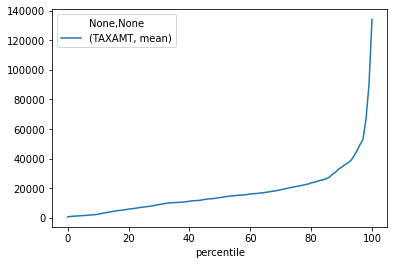

In [44]:
result.plot()

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

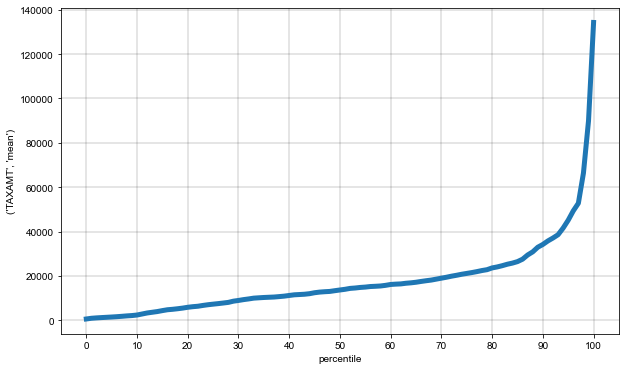

In [46]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x=result.index, y = result.iloc[:,0], linewidth=5)
#ax.grid = True
ax.set_xticks(range(0, 110,10))
ax.grid(color='black', linestyle='-', linewidth=0.2)

sns.set_style('dark')

In [47]:
# Lets do the same as above but for the non-sellers

In [48]:
Hancock_Park_NonSellers_df['percentile'] = Hancock_Park_NonSellers_df['TAXAMT'].rank(pct = True)

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
Hancock_Park_NonSellers_df['percentile'] = Hancock_Park_NonSellers_df['percentile'] * 100

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
Hancock_Park_NonSellers_df['percentile'] = Hancock_Park_NonSellers_df['percentile'].round()

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
Hancock_Park_NonSellers_df['percentile'] = Hancock_Park_NonSellers_df['percentile'].astype(int)

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
result_nonsellers = Hancock_Park_NonSellers_df.groupby('percentile').agg({'TAXAMT': ['mean']})

In [53]:
result_nonsellers.iloc[:,0] = result_nonsellers.iloc[:,0].round()

In [54]:
result_nonsellers

,TAXAMT
,mean
percentile,
0,467.0
1,838.0
2,995.0
3,1128.0
4,1261.0
...,...
96,40370.0
97,43977.0


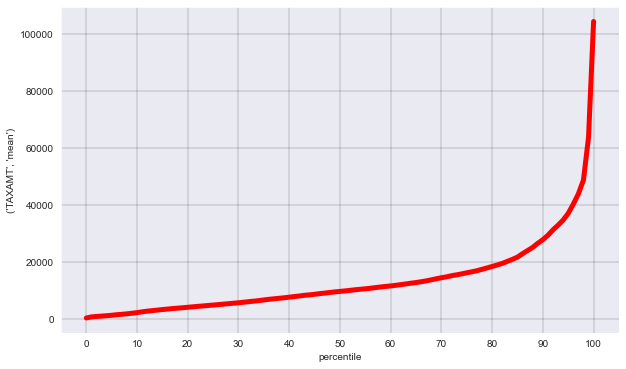

In [55]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x=result_nonsellers.index, y = result_nonsellers.iloc[:,0], color = 'r', linewidth=5)
#ax.grid = True
ax.set_xticks(range(0, 110,10))
ax.grid(color='black', linestyle='-', linewidth=0.2)

sns.set_style('dark')

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


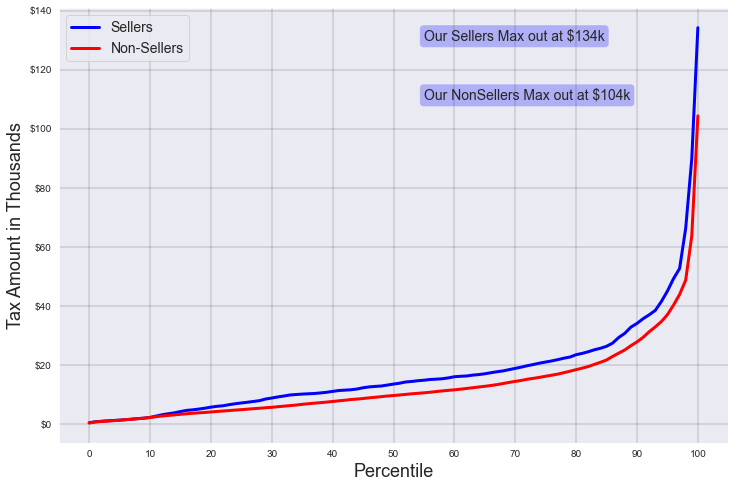

In [56]:
# now plot them both together

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=result.index, y = result.iloc[:,0], linewidth=3, color = 'blue', ax=ax)
sns.lineplot(x=result_nonsellers.index, y = result_nonsellers.iloc[:,0], color = 'r', linewidth=3, ax=ax)

ax.set_xticks(range(0, 110,10))
#ax.set_xticklabels([f'{i}th' for i in range(-10,101,10)])
ax.set_yticklabels([f'${i}' for i in range(-20,161,20)])
ax.set_ylabel('Tax Amount in Thousands', fontsize=18)
ax.set_xlabel('Percentile', fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=14)

props = dict(boxstyle='round', facecolor='blue', alpha = 0.25)

#add lines for our y-intercepts
ax.text(55, 130000, 'Our Sellers Max out at $134k', fontsize=14, bbox = props)
ax.text(55, 110000, 'Our NonSellers Max out at $104k', fontsize=14, bbox = props)

sns.set_style('dark')

plt.savefig('Total_TaxAmount_Percentiles_SFR.png')

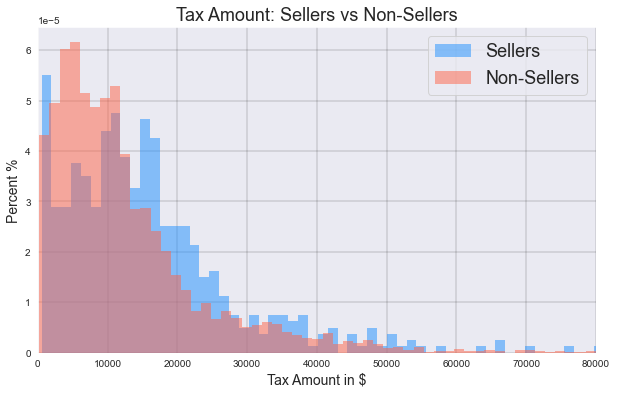

In [152]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hancock_Park_Sellers_df['TAXAMT'], bins=100, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hancock_Park_NonSellers_df['TAXAMT'], bins=100, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Tax Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Tax Amount in $', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)

ax.set_xlim(0,80000)
plt.savefig('Hancock_Park_TaxAmount_DensityDistribution_SFR.png')

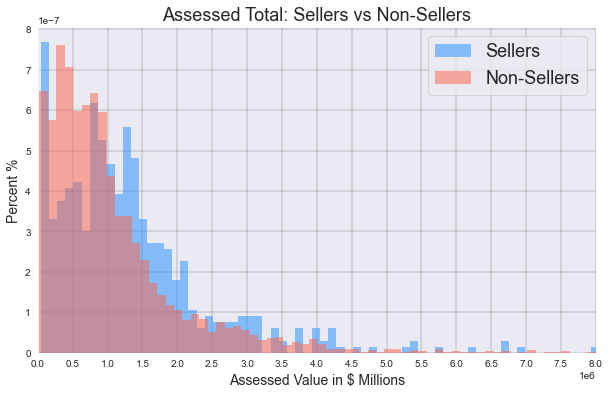

In [150]:
# now do assessed total

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hancock_Park_Sellers_df['ASSDTOTAL'], bins=100, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hancock_Park_NonSellers_df['ASSDTOTAL'], bins=100, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Assessed Total: Sellers vs Non-Sellers', fontsize=18)
ax.set_xticks(range(0, 10000000,500000))
ax.set_xlabel('Assessed Value in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)

ax.set_xlim(0,8000000)
plt.savefig('Hancock_Park_AssessedTotal_DensityDistribution_SFR.png')

In [110]:
Hancock_Park_Sellers_df['LOANAMOUT1'] = Hancock_Park_Sellers_df['LOANAMOUT1'][Hancock_Park_Sellers_df['LOANAMOUT1'] != 0]

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
Hancock_Park_NonSellers_df['LOANAMOUT1'] = Hancock_Park_NonSellers_df['LOANAMOUT1'][Hancock_Park_NonSellers_df['LOANAMOUT1'] != 0]

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


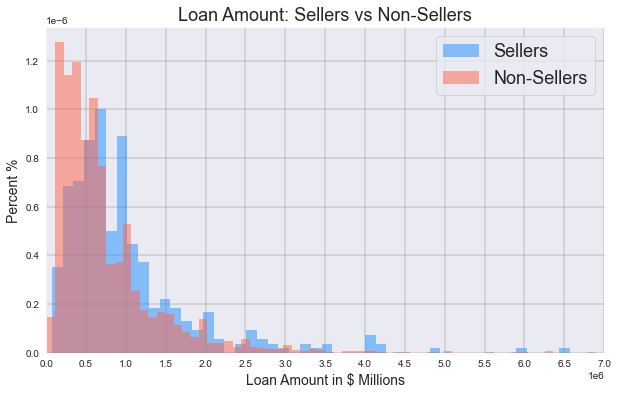

In [148]:
# now do loan amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hancock_Park_Sellers_df['LOANAMOUT1'], bins=70, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hancock_Park_NonSellers_df['LOANAMOUT1'], bins=70, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Loan Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xticks(range(0, 10000000,500000))
ax.set_xlabel('Loan Amount in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)

ax.set_xlim(0,7000000)
plt.savefig('Hancock_Park_LoanAmount_DensityDistribution_SFR.png')

In [116]:
Hancock_Park_Sellers_df['PRICE'] = Hancock_Park_Sellers_df['PRICE'][Hancock_Park_Sellers_df['PRICE'] != 0]
Hancock_Park_NonSellers_df['PRICE'] = Hancock_Park_NonSellers_df['PRICE'][Hancock_Park_NonSellers_df['PRICE'] != 0]

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


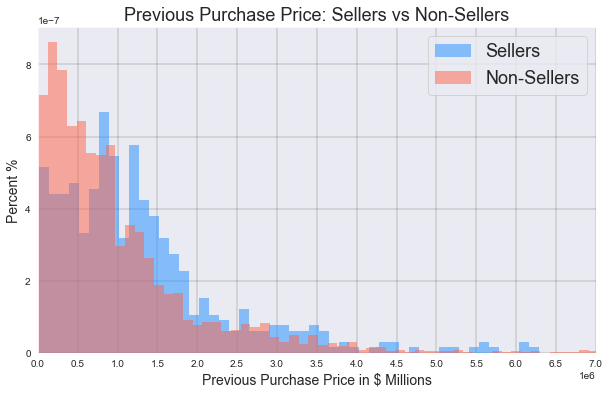

In [146]:
# now do price amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hancock_Park_Sellers_df['PRICE'], bins=200, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hancock_Park_NonSellers_df['PRICE'], bins=400, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Previous Purchase Price: Sellers vs Non-Sellers', fontsize=18)
ax.set_xticks(range(0, 10000000,500000))
ax.set_xlabel('Previous Purchase Price in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)

ax.set_xlim(0,7000000)
plt.savefig('Hancock_Park_PreviousPurchasePrice_DensityDistribution_SFR.png')

In [153]:
# now do docdate_year
Hancock_Park_Sellers_df['DOCDATE_YEAR'] = Hancock_Park_Sellers_df['DOCDATE_YEAR'][Hancock_Park_Sellers_df['DOCDATE_YEAR'] != 0]
Hancock_Park_NonSellers_df['DOCDATE_YEAR'] = Hancock_Park_NonSellers_df['DOCDATE_YEAR'][Hancock_Park_NonSellers_df['DOCDATE_YEAR'] != 0]

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


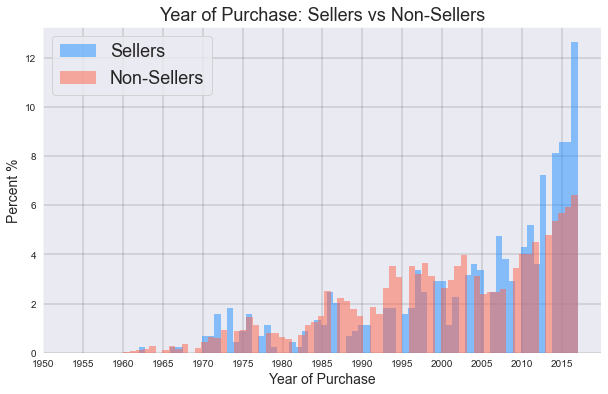

In [164]:
# now do docdate year

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Hancock_Park_Sellers_df['DOCDATE_YEAR'], bins=70, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Hancock_Park_NonSellers_df['DOCDATE_YEAR'], bins=70, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Year of Purchase: Sellers vs Non-Sellers', fontsize=18)
ax.set_xticks(range(1950, 2020, 5))
ax.set_xlabel('Year of Purchase', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)
ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14])

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)

ax.set_xlim(1950,2020)
plt.savefig('Hancock_Park_YearOfPurchase_DensityDistribution_SFR.png')

In [66]:
assd_x = Hancock_Park_Sellers_df[Hancock_Park_Sellers_df['ASSDTOTAL'] != 0]

<AxesSubplot:xlabel='MAIL DIFFERENT FROM SITE?', ylabel='ASSDTOTAL'>

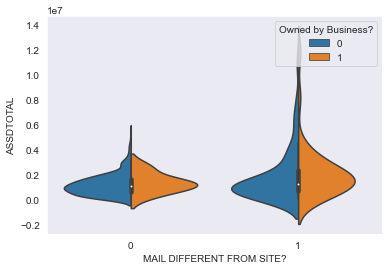

In [75]:
# lets do violin plots

sns.violinplot(data = assd_x, x='MAIL DIFFERENT FROM SITE?', y = 'ASSDTOTAL', hue='Owned by Business?', split=True)

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:ylabel='Density'>

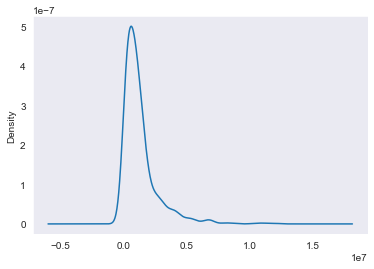

In [87]:
a = Hancock_Park_df[Hancock_Park_df['MAIL DIFFERENT FROM SITE?'] == 1]
b = a[a['Owned by Business?'] == 0]

b['ASSDTOTAL'] = b['ASSDTOTAL'][b['ASSDTOTAL'] != 0]

#b.hist(column = 'ASSDTOTAL', bins=50, density=True)
b['ASSDTOTAL'].plot.kde()

<AxesSubplot:title={'center':'ASSDTOTAL'}, ylabel='Density'>

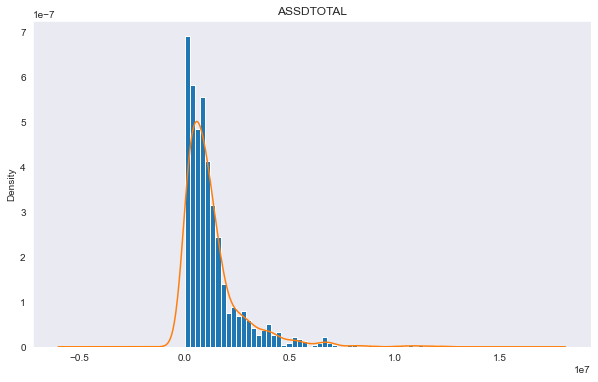

In [90]:
# lets do both 

fig, ax = plt.subplots(figsize=(10,6))

b.hist(column = 'ASSDTOTAL', bins=50, density=True, ax = ax)
b['ASSDTOTAL'].plot.kde(ax = ax)

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:title={'center':'LOANAMOUT1'}, ylabel='Density'>

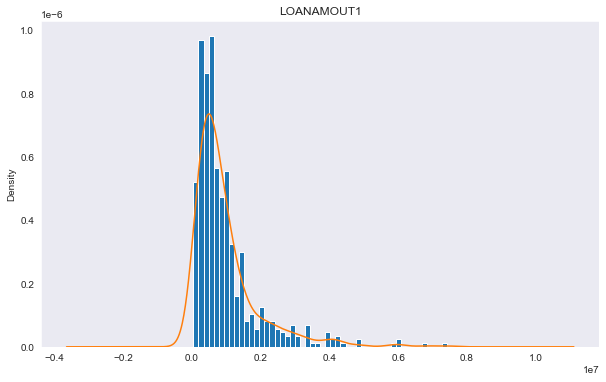

In [93]:
# lets do both 

fig, ax = plt.subplots(figsize=(10,6))

b['LOANAMOUT1'] = b['LOANAMOUT1'][b['LOANAMOUT1'] != 0]

b.hist(column = 'LOANAMOUT1', bins=50, density=True, ax = ax)
b['LOANAMOUT1'].plot.kde(ax = ax)

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 10000000.0)

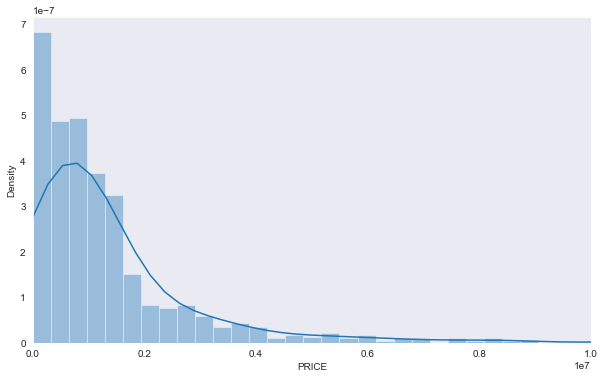

In [108]:
# lets do both 

fig, ax = plt.subplots(figsize=(10,6))

b['PRICE'] = b['PRICE'][b['PRICE'] != 0]

#b.hist(column = 'PRICE', bins=150, density=True, ax = ax)
sns.distplot(b['PRICE'], bins=150, ax = ax, kde=True)
#b['PRICE'].plot.kde(ax = ax)

ax.set_xlim(0,10000000)

In [ ]:
sns.violinplots(data = Hancock_Park_df,)

In [62]:
#Hancock_Park_df = Hancock_Park_df[Hancock_Park_df['SITEADDRESS'].str.contains('#')]
Hancock_Park_Sellers_df

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,FAMILYRM,DININGRM,POOL,PATIO,FIREPLCE,AIRMTHOD,HEATMTHD,VIEW,Did it sell?,percentile
PARCEL,,,,,,,,,,,,,,,,,,,,,
5515022015,1,0,0,0,0,1304706,731909,572797,0,0,...,0,0,0,0,0,0,0,0,1,59
5516023003,1,0,0,0,0,582687,466154,116533,0,0,...,0,0,0,0,0,0,0,0,1,25
5515023004,0,0,0,0,0,732290,518993,213297,0,0,...,0,0,0,0,0,0,0,0,1,30
5523001002,0,0,0,0,0,950936,615024,335912,0,0,...,0,0,0,0,0,0,0,0,1,43
5515012004,0,0,0,0,0,718038,545610,172428,0,0,...,0,0,0,0,0,0,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092002012,0,0,0,0,0,499782,365116,134666,0,0,...,0,0,0,0,0,0,0,0,1,21
5090001011,0,0,0,0,0,1121158,837495,283663,0,0,...,0,0,0,0,0,0,0,0,1,50
5507014010,0,0,1,0,0,787957,630372,157585,0,0,...,0,0,0,0,0,0,0,0,1,32


In [483]:
#Hancock_Park_Results_SFRs_df = Hancock_Park_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")

Hancock_Park_Sellers_df = Hancock_Park_Sellers_df.merge(result, how="left", right_on="percentile", left_on="percentile")

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [484]:
Hancock_Park_Sellers_df.drop(['percentile_mean'], inplace=True, axis=1)

KeyError: "['percentile_mean'] not found in axis"

In [ ]:
Hancock_Park_Sellers_df.columns = [*Hancock_Park_Sellers_df.columns[:-1], 'Tax Percentile Mean']

In [ ]:
Hancock_Park_Sellers_df['Tax Percentile Mean'] = Hancock_Park_Sellers_df['Tax Percentile Mean'].round()
Hancock_Park_Sellers_df

In [ ]:
import matplotlib.pyplot as plt
ax = plt.gca()

Hancock_Park_Sellers_df.plot(kind='line', x='percentile', y='Tax Percentile Mean', ax=ax)

In [ ]:
HP_Sellers_Chart_df = pd.DataFrame(Hancock_Park_Sellers_df, columns = ['percentile', 'Tax Percentile Mean'])

In [ ]:
HP_Sellers_Chart_df = HP_Sellers_Chart_df.drop_duplicates()

In [ ]:
HP_Sellers_Chart_df.head(3)

# Now do the same for Condos

In [ ]:
file = 'Hancock_Park_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [ ]:
path = os.path.join(location, file)

In [ ]:
Hancock_Park_df = pd.read_csv(path, index_col='PARCEL')
Hancock_Park_df.head()

In [ ]:
# drop any nulls

Hancock_Park_df = Hancock_Park_df.dropna()

In [ ]:
# Change the datatype of these two columns into ints

Hancock_Park_df['TAXAMT'] = Hancock_Park_df['TAXAMT'].astype(int)
Hancock_Park_df['EFFYRBLT'] = Hancock_Park_df['EFFYRBLT'].astype(int)

In [ ]:
# Make sure our dataframe is only condos

Hancock_Park_df = Hancock_Park_df[Hancock_Park_df['SITEADDRESS'].str.contains('#')]

In [ ]:
# Now drop the SiteAddress column
Hancock_Park_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [ ]:
# Now split the sellers from the non-sellers:

Hancock_Park_Sellers_df = Hancock_Park_df[Hancock_Park_df['Did it sell?'] == 1]
Hancock_Park_Sellers_df.head()

In [ ]:
Hancock_Park_NonSellers_df = Hancock_Park_df[Hancock_Park_df['Did it sell?'] == 0]
Hancock_Park_NonSellers_df.head()

In [ ]:
# Mail different from Site

sum(Hancock_Park_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hancock_Park_Sellers_df['MAIL DIFFERENT FROM SITE?']) * 100

In [ ]:
sum(Hancock_Park_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hancock_Park_NonSellers_df['MAIL DIFFERENT FROM SITE?']) * 100

In [ ]:
# Mail outside California

sum(Hancock_Park_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hancock_Park_Sellers_df['MAIL OUTSIDE CA?']) * 100

In [ ]:
sum(Hancock_Park_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hancock_Park_NonSellers_df['MAIL OUTSIDE CA?']) * 100

In [ ]:
# House size

Hancock_Park_Sellers_df['TOTALSF'].mean()